In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# alphabet of death  useful for mapping the names into something more human readable
code_to_name = {
    'A-R_V-Y': 'Total Deaths',
    'ACC': 'Accidents',
    'A_B': 'Infectious and Parasitic Diseases',
    'C00-D48': 'Neoplasms',
    'D50-D89': 'Diseases of the Blood',
    'E': 'Endocrine, Nutritional and Metabolic Diseases',
    'F': 'Mental and Behavioural Disorders',
    'F10': 'Abuse of Alcohol',
    'G_H': 'Diseases of the Nervous System and the Sense Organs',
    'I': 'Diseases of the Circulatory System',
    'J': 'Diseases of the Respiratory System',
    'K': 'Diseases of the Digestive System',
    'L': 'Diseases of the Skin and Subcutaneous Tissue',
    'M': 'Diseases of the Musculoskeletal System and Connective Tissue',
    'N': 'Diseases of the Genitourinary System',
    'TOXICO': 'Abuse of Drugs',
    'U071': 'COVID-19',
    'V_Y85': 'Transport Accidents',
    'X60-X84_Y870': 'Intentional Self-Harm',
    'X85-Y09_Y871': 'Assault'
}


In [3]:
#Reading in our Datasets
df_demographic = pd.read_csv("DopData/DemographicData.csv")
df_final1 = pd.read_csv("DopData/df_final1.csv", index_col=[0, 1])
cod_df = pd.read_csv("DopData/df_final2.csv", index_col=[0, 1])
df_final = pd.read_csv("DopData/df_final.csv", index_col=[0, 1])
df_health = pd.read_csv("DopData/df_health.csv")
display(df_final1)
#display(cod_df)
#display(df_final.head())
#display(df_health.head())

A-R_V-Y   ACC   A_B  C00-D48  D50-D89     E     F  F10  \
causes of death                                                               
TIME_PERIOD     geo      NaN   NaN   NaN      NaN      NaN   NaN   NaN  NaN   
1994            AL       0.0   0.0   0.0      0.0      0.0   0.0   0.0  0.0   
                AT    1360.6  46.6   5.6    319.3      2.0  28.5   3.8  2.5   
                BE    1334.0  49.3  16.7    346.8      6.3  29.1  28.5  2.9   
                BG       0.0   0.0   0.0      0.0      0.0   0.0   0.0  0.0   
...                      ...   ...   ...      ...      ...   ...   ...  ...   
2010            RO    1585.9  44.8  12.9    262.7      0.8  14.8   1.5  1.0   
                SE     972.7  31.6  20.8    248.6      3.1  26.2  53.0  2.9   
                SI    1083.6  51.5   4.9    326.9      2.1  16.4   7.2  6.9   
                SK    1507.4  35.9   9.9    310.4      1.2  20.3   0.0  0.0   
                UK    1016.3  23.2  10.7    294.0      2.0  15.3  42.7  1.4   

                      G_H       I      J     K    L    M     N  TOXICO  V_Y85  \
causes of death                                                                 
TIME_PERIOD     geo   NaN     NaN    NaN   NaN  NaN  NaN   NaN     NaN    NaN   
1994            AL    0.0     0.0    0.0   0.0  0.0  0.0   0.0     0.0    0.0   
                AT   20.1   748.1   60.8  64.2  0.7  2.4  14.1     0.7   17.0   
                BE   38.4   517.5  123.8  55.2  6.7  8.1  21.0     0.6   18.8   
                BG    0.0     0.0    0.0   0.0  0.0  0.0   0.0     0.0    0.0   
...                   ...     ...    ...   ...  ...  ...   ...     ...    ...   
2010            RO   15.5  1016.3   75.5  89.9  0.5  0.2  15.1     0.0   14.1   
                SE   39.0   381.3   54.7  29.4  1.6  5.1  11.9     0.3    3.4   
                SI   16.9   451.5   69.5  63.8  2.8  4.5  16.8     0.0    8.3   
                SK   18.6   877.9   97.1  67.4  0.0  1.4  22.1     0.0    9.6   
                UK   37.6   325.9  138.8  52.8  3.7  8.4  25.6     1.5    3.6   

                     X60-X84_Y870  X85-Y09_Y871  
causes of death                                  
TIME_PERIOD     geo           NaN           NaN  
1994            AL            0.0           0.0  
                AT           24.4           1.2  
                BE           22.5           1.8  
                BG            0.0           0.0  
...                           ...           ...  
2010            RO           13.7           2.6  
                SE           12.4           0.9  
                SI           20.3           0.5  
                SK           12.0           1.3  
                UK            6.8           0.3  

[596 rows x 19 columns]

In [6]:
# some datasets have a different column name for year 
df_health.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year'}, inplace=True)
df_health['year'] = df_health['year'].astype(int)
country_df = pd.merge(df_demographic, df_health, on=['country', 'year'])
country_df.columns
country_df.drop(columns=["Unnamed: 0_x","Unnamed: 0_y"],inplace=True)
display(country_df)
# this is dataset has few rows because it of the missing years for the for health data. It is not used in the code

,country,year,total population,Immigrants - emigrants,median age,over 80,over 60,% daily Alcohol consumers,% daily Tobacco consumers,% active population,% no daily Fruit/Veg consumers,% overweight population
0,AT,2014,8546356.0,73670.0,42.9,5.0,23.8,6.5,22.4,25.1,32.2,48.0
1,BE,2014,11209057.0,36175.0,41.3,5.3,23.7,14.5,18.7,NaN,15.2,48.3
2,BG,2014,7223938.0,-2112.0,43.2,4.4,26.7,8.8,28.2,5.3,58.7,52.9
3,CY,2014,852504.0,-14826.0,36.8,3.1,19.3,4.1,24.9,5.6,32.6,48.1
4,CZ,2014,10525347.0,21661.0,40.8,3.9,24.3,9.5,21.3,8.2,46.3,55.6
...,...,...,...,...,...,...,...,...,...,...,...,...
61,SE,2019,10278887.0,71647.0,40.5,5.1,25.4,1.8,7.0,32.6,37.4,49.9
62,SI,2019,2088385.0,16213.0,44.0,5.3,26.8,6.7,17.0,13.6,31.9,56.4
63,SK,2019,5454147.0,3632.0,40.6,3.3,22.7,4.1,21.0,9.9,41.3,57.9
64,TR,2019,82579440.0,403404.0,32.0,1.8,13.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Here I deal with the multi index and year to prepare for the merge
cod_df_reset = cod_df.reset_index()
cod_df_reset = cod_df_reset.drop(index=0)
cod_df_reset.rename(columns={'causes of death': 'year', 'level_1': 'country'}, inplace=True)
cod_df_reset.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year'}, inplace=True)
cod_df_reset['year'] = cod_df_reset['year'].astype(int)

# merging on country and year
data = pd.merge(country_df, cod_df_reset, on=['country', 'year'])
# here NA columsn ar edropped but maybe we should replace them with the mean as flo mentioend
print(f"Number of NA rows {data.isna().any(axis=1).sum()}")
data = data.dropna()
display(data.head())
data.columns

causes_of_death=cod_df_reset.columns.to_numpy()[2:]
health_factors=country_df.columns.to_numpy()[3:]
demographic_factors=country_df.columns.to_numpy()[3:7]

Number of NA rows 10


,country,year,total population,Immigrants - emigrants,median age,over 80,over 60,% daily Alcohol consumers,% daily Tobacco consumers,% active population,...,J,K,L,M,N,TOXICO,U071,V_Y85,X60-X84_Y870,X85-Y09_Y871
0,AT,2014,8546356.0,73670.0,42.9,5.0,23.8,6.5,22.4,25.1,...,46.63,33.29,0.66,3.06,18.56,1.55,0.0,5.76,15.25,0.43
2,BG,2014,7223938.0,-2112.0,43.2,4.4,26.7,8.8,28.2,5.3,...,58.33,52.55,0.66,0.78,19.33,0.00,0.0,9.03,9.91,1.33
3,CY,2014,852504.0,-14826.0,36.8,3.1,19.3,4.1,24.9,5.6,...,86.22,38.02,5.91,6.39,34.20,0.00,0.0,6.46,4.50,1.14
4,CZ,2014,10525347.0,21661.0,40.8,3.9,24.3,9.5,21.3,8.2,...,73.35,47.59,2.02,2.17,15.00,0.04,0.0,7.76,14.36,0.74
5,DE,2014,80982500.0,583503.0,45.6,5.4,27.2,9.2,15.7,23.9,...,67.97,44.49,1.68,3.89,26.14,1.00,0.0,4.61,11.94,0.46


In [8]:
demographic_factors

array(['Immigrants - emigrants', 'median age', 'over 80', 'over 60'],
      dtype=object)

In [9]:
demographic_factors

array(['Immigrants - emigrants', 'median age', 'over 80', 'over 60'],
      dtype=object)

In [10]:
# here I merge without the helath data
cod_df_reset = cod_df.reset_index()
cod_df_reset = cod_df_reset.drop(index=0)
cod_df_reset.rename(columns={'causes of death': 'year', 'level_1': 'country'}, inplace=True)
cod_df_reset.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year'}, inplace=True)
cod_df_reset['year'] = cod_df_reset['year'].astype(int)

data_dem = pd.merge(df_demographic, cod_df_reset, on=['country', 'year'])
print(f"Number of NA rows {data.isna().any(axis=1).sum()}")
data_dem = data_dem.dropna()
display(data_dem.head())
data_dem.columns


causes_of_death=cod_df_reset.columns.to_numpy()[2:]
demographic_factors=df_demographic.columns.to_numpy()[3:]


Number of NA rows 0


,Unnamed: 0,country,year,total population,Immigrants - emigrants,median age,over 80,over 60,A-R_V-Y,ACC,...,J,K,L,M,N,TOXICO,U071,V_Y85,X60-X84_Y870,X85-Y09_Y871
0,613,AT,2011,8391643.0,31327.0,42.0,4.9,23.3,994.58,32.29,...,53.78,38.19,0.75,3.54,17.89,2.66,0.0,6.76,15.54,0.55
1,614,BE,2011,11038264.0,50838.0,40.9,5.0,23.0,1023.10,40.23,...,104.95,45.40,2.72,4.92,25.61,0.27,0.0,8.54,19.27,1.35
2,615,BG,2011,7348328.0,-4795.0,42.5,4.0,25.8,1689.88,23.61,...,61.37,45.07,0.34,0.94,17.14,0.10,0.0,8.48,10.40,1.28
3,616,CH,2011,7912398.0,65811.0,41.6,4.7,22.7,872.60,34.10,...,53.34,34.52,1.34,7.73,13.07,0.57,0.0,4.64,13.23,0.53
4,617,CY,2011,850881.0,18142.0,35.7,2.9,18.1,1024.77,30.23,...,79.08,38.38,7.74,4.17,35.28,0.00,0.0,9.55,3.97,2.34


In [11]:
data_dem

,Unnamed: 0,country,year,total population,Immigrants - emigrants,median age,over 80,over 60,A-R_V-Y,ACC,...,J,K,L,M,N,TOXICO,U071,V_Y85,X60-X84_Y870,X85-Y09_Y871
0,613,AT,2011,8391643.0,31327.0,42.0,4.9,23.3,994.58,32.29,...,53.78,38.19,0.75,3.54,17.89,2.66,0.00,6.76,15.54,0.55
1,614,BE,2011,11038264.0,50838.0,40.9,5.0,23.0,1023.10,40.23,...,104.95,45.40,2.72,4.92,25.61,0.27,0.00,8.54,19.27,1.35
2,615,BG,2011,7348328.0,-4795.0,42.5,4.0,25.8,1689.88,23.61,...,61.37,45.07,0.34,0.94,17.14,0.10,0.00,8.48,10.40,1.28
3,616,CH,2011,7912398.0,65811.0,41.6,4.7,22.7,872.60,34.10,...,53.34,34.52,1.34,7.73,13.07,0.57,0.00,4.64,13.23,0.53
4,617,CY,2011,850881.0,18142.0,35.7,2.9,18.1,1024.77,30.23,...,79.08,38.38,7.74,4.17,35.28,0.00,0.00,9.55,3.97,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,964,PT,2020,10297081.0,41209.0,45.5,6.6,28.7,1044.03,26.75,...,94.51,43.53,4.03,4.50,31.48,0.12,58.33,6.28,8.48,0.80
343,965,RO,2020,19265250.0,-27220.0,42.8,4.8,25.7,1621.57,34.96,...,115.31,79.92,0.36,0.25,25.08,0.03,90.80,11.11,9.04,1.47
345,967,SE,2020,10353442.0,36753.0,40.5,5.2,25.5,934.38,31.12,...,52.20,27.96,2.04,4.55,14.13,0.13,85.85,2.63,11.91,1.26
346,968,SI,2020,2102419.0,18365.0,44.1,5.4,27.1,1112.42,60.78,...,38.59,43.20,0.27,3.38,10.40,1.09,161.73,6.02,17.01,0.73


In [12]:
data_dem["country"].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI',
       'SK', 'TR', 'UK', 'NO'], dtype=object)

In [13]:
demographic_factors

array(['total population', 'Immigrants - emigrants', 'median age',
       'over 80', 'over 60'], dtype=object)

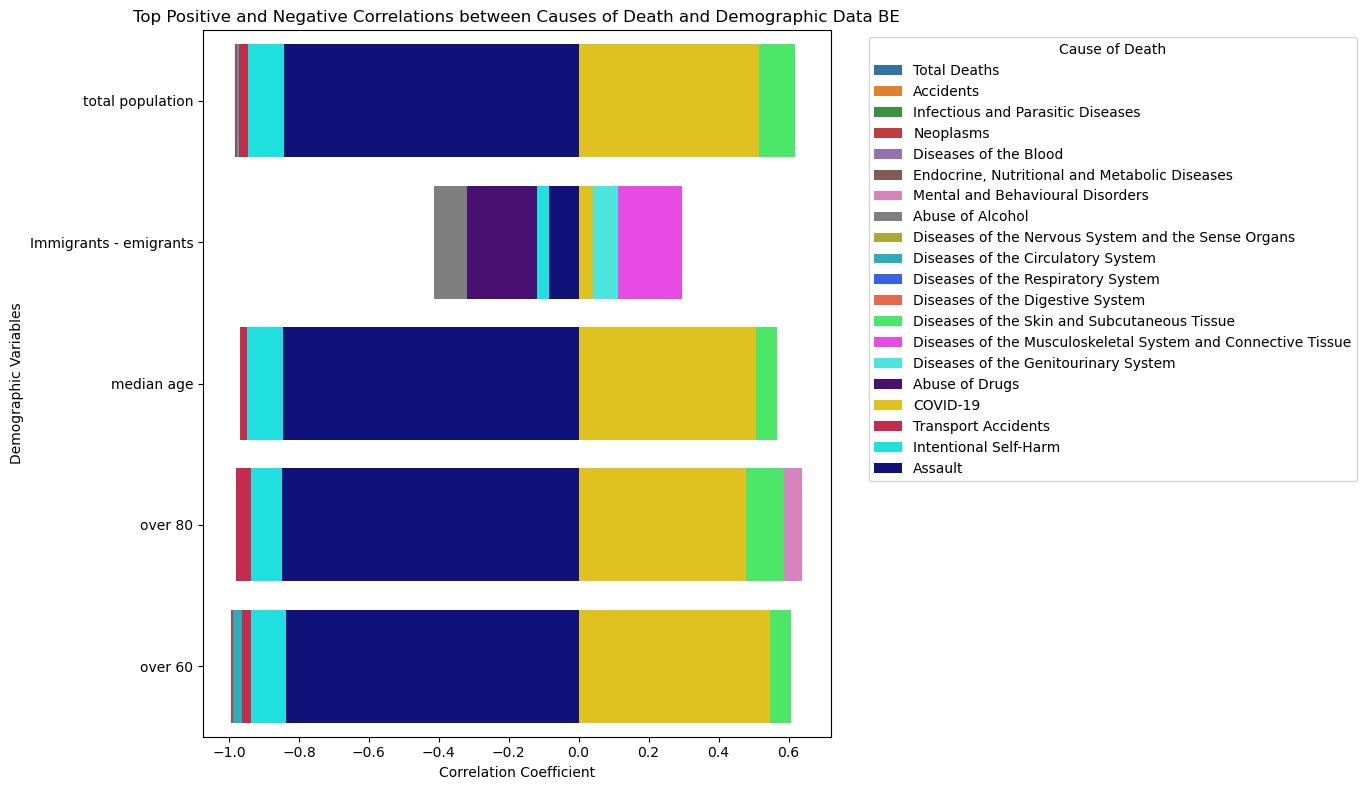

                        Unnamed: 0      year  total population  \
Unnamed: 0                1.000000  1.000000          0.999404   
year                      1.000000  1.000000          0.999404   
total population          0.999404  0.999404          1.000000   
Immigrants - emigrants    0.199103  0.199103          0.193496   
median age                0.990268  0.990268          0.990436   
over 80                   0.972657  0.972657          0.977706   
over 60                   0.998318  0.998318          0.996620   
A-R_V-Y                  -0.475701 -0.475701         -0.476915   
ACC                      -0.839112 -0.839112         -0.827133   
A_B                      -0.831131 -0.831131         -0.831011   
C00-D48                  -0.985965 -0.985965         -0.981458   
D50-D89                  -0.245444 -0.245444         -0.244763   
E                        -0.865612 -0.865612         -0.865860   
F                         0.513234  0.513234          0.534428   
F10       

In [14]:

# return corr matrix 
def get_country_corr(dataframe, country):
    country_data = dataframe[dataframe["country"] == country]
    return country_data.corr(numeric_only=True)

 

country_name = "BE"
corr = get_country_corr(data_dem, country_name)

relevant_correlations = corr.loc[demographic_factors, causes_of_death]

flat_relevant_correlations = relevant_correlations.unstack().reset_index()
flat_relevant_correlations.columns = ['CauseOfDeath', 'DemographicVariable', 'Correlation']
flat_relevant_correlations.dropna(inplace=True)


flat_relevant_correlations['CauseOfDeath'] = flat_relevant_correlations['CauseOfDeath'].map(code_to_name)
sorted_relevant_correlations = flat_relevant_correlations.copy()
sorted_relevant_correlations['AbsCorrelation'] = sorted_relevant_correlations['Correlation'].abs()
# custom color codes so its clearer for the eye I asked GPT to generate those  so if you add more columns just add some colors for them
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1a55FF', '#FF5733', '#33FF57', '#FF33FB', '#33FFF6',
                  '#4B0082', '#FFD700', '#DC143C', '#00FFFF', '#00008B']



plt.figure(figsize=(14,8))
sns.barplot(x='Correlation', y='DemographicVariable', data=sorted_relevant_correlations,
            hue='CauseOfDeath', dodge=False, palette=custom_palette)

plt.title('Top Positive and Negative Correlations between Causes of Death and Demographic Data ' + country_name)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Demographic Variables')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
print(corr)
